<a href="https://colab.research.google.com/github/Adansote/Proyecto-ventas-JUPYTER/blob/main/Proyecto_Ventas_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto ventas**

Este proyecto se realiza con jupyter utilizando metodologia de google

**1. Ask (Preguntar)**
En esta fase definimos el problema y los objetivos. Antes de escribir código, debes tener claro qué quieres resolver.

Objetivo: Identificar patrones de venta para optimizar el inventario y las campañas de marketing.

Preguntas clave:

**Rendimiento General:**

¿Cuál es el crecimiento interanual y mensual de las ventas totales (ingresos)?

¿Qué mes o temporada del año presenta el mayor volumen de ventas? ¿Hay estacionalidad marcada?

¿Cuál es la tienda con mayor crecimiento y cuál está estancada o en declive?

**Desempeño por Segmentos:¨**

¿Qué categoría de producto genera mayores ingresos y cuál tiene el mayor margen (suponiendo que precio refleja costo + margen)?

¿Qué vendedor es el más eficiente? (Podemos medir por ingresos totales, cantidad de transacciones, o ticket promedio).

¿Existen productos "estrellas" que generan un porcentaje desproporcionado de las ventas? (Análisis de Pareto).

**Eficiencia Operativa:**

¿El precio unitario de los mismos productos varía entre tiendas o vendedores? (Podría indicar descuentos no controlados o errores).

¿Cuál es el ticket promedio por transacción y cómo ha evolucionado?

**2. Prepare (Preparar)**
Aquí recolectamos y cargamos los datos. En tu Jupyter Notebook, esto significa importar las librerías necesarias y cargar tu dataset.

**Integridad y Consistencia:**

¿Hay fechas fuera del rango esperado? (Ej. 01/01/2039 parece un error de entrada, podría ser 2019 o 2029).

¿Existen valores nulos o faltantes en columnas críticas como producto, cantidad o precio?

¿La columna total es siempre igual a cantidad * precio? Si no, ¿por qué? (Errores de registro o impuestos/descuentos).

**Estructura:**

¿Tenemos un identificador único por transacción? (No existe, ¿podríamos necesitarlo?).

¿Los nombres de productos, categorías y vendedores están estandarizados? (Ej. "niños" vs "nińos").

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
# confi estilo de visualizacion
# Configurar estilo de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv("/content/Productos_vendidos_portienda_origen.csv", encoding='latin-1')
#df = pd.read_csv("/content/Productos_vendidos_portienda .csv") genera error

In [ ]:
df.head()

,fecha,tienda,categoria de producto,vendedor,producto,cantidad,precio,total
0,01/02/2026,Tienda B,Juguetes,Lucia,Puzzle 1000 piezas,6,625.01,3750.06
1,01/02/2026,Tienda E,Hogar,Maria,Cafetera Delonghi,1,84.42,84.42
2,01/03/2026,Tienda C,Ropa,Maria,Pantalon Levi's,5,560.97,2804.85
3,01/04/2026,Tienda D,Electronica,Ana,Smartphone Samsung,10,1197.81,11978.10
4,01/05/2026,Tienda E,Hogar,Maria,Ventilador Imaco,2,349.98,699.96


**3. Process (Procesar)**
Esta es la fase de limpieza de datos. Debes buscar errores, valores nulos o formatos incorrectos para asegurar que tu análisis sea fiable.

**Limpieza de Datos:**

¿Cómo manejar los registros con fechas potencialmente erróneas (ej. años 2030-2045)? ¿Los excluimos, los imputamos o los investigamos?

Si hay discrepancias en total, ¿cual tomamos como verdad: el campo calculado o el registrado?

¿Debemos eliminar o ajustar outliers extremos en precio o cantidad? (Ej. una cantidad de 1000 podría ser un error).

**Transformación:**

¿Necesitamos crear nuevas columnas como mes_año, día_semana, trimestre para facilitar el análisis temporal?

¿Agrupamos productos en subcategorías si los nombres son muy específicos?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha                  500 non-null    object 
 1   tienda                 500 non-null    object 
 2   categoria de producto  500 non-null    object 
 3   vendedor               500 non-null    object 
 4   producto               500 non-null    object 
 5   cantidad               500 non-null    int64  
 6   precio                 500 non-null    float64
 7   total                  500 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ KB


** No hay un identificador unico de ventas esto se corre el riego de duplicas o alguna otrirregularidad**

In [ ]:
# Creamos un ID que empiece en 10001 hasta el final de las filas
df['ID_Unico'] = range(10001, 10001 + len(df))

In [ ]:
# Contar nulos por columna
print("Nulos por columna:")
print(df.isnull().sum())

Nulos por columna:
fecha                    0
tienda                   0
categoria de producto    0
vendedor                 0
producto                 0
cantidad                 0
precio                   0
total                    0
ID_Unico                 0
dtype: int64


In [ ]:
#cambiar tipo de dato fecha de object a datetime
print(df['fecha'].dtype)


object


In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'])
print(df['fecha'].dtype)

datetime64[ns]


In [ ]:
# df.dropna(inplace=True) en dado caso que ubiera valores nulos

In [ ]:
# para este caso se tendra que corregir las fechas para que sean mas adecuadas y no este fuera de rango ni logicas

In [ ]:
print("📅 Análisis de años en las fechas originales:")
print("-" * 50)
print("Años únicos encontrados:")
anos_originales = sorted(df['fecha'].dt.year.dropna().unique())
print(anos_originales)

📅 Análisis de años en las fechas originales:
--------------------------------------------------
Años únicos encontrados:
[np.int32(2021), np.int32(2023), np.int32(2024), np.int32(2025), np.int32(2026), np.int32(2028), np.int32(2031), np.int32(2032), np.int32(2033), np.int32(2034), np.int32(2035), np.int32(2036), np.int32(2037), np.int32(2038), np.int32(2039), np.int32(2040), np.int32(2041), np.int32(2042), np.int32(2043), np.int32(2044), np.int32(2045)]


In [ ]:
# Contar registros por año
conteo_anos = df['fecha'].dt.year.value_counts().sort_index()
print("\n📊 Conteo de registros por año (original):")
print(conteo_anos)


📊 Conteo de registros por año (original):
fecha
2021      1
2023     25
2024    129
2025    193
2026    136
2028      1
2031      1
2032      1
2033      1
2034      1
2035      1
2036      1
2037      1
2038      1
2039      1
2040      1
2041      1
2042      1
2043      1
2044      1
2045      1
Name: count, dtype: int64


**si hay fechas fuera de rango o coomo se les llama outliers **

In [ ]:
df_filtrado_fechas = df[(df['fecha'] <= '30-12-2026') ]

In [ ]:
df_filtrado_fechas

,fecha,tienda,categoria de producto,vendedor,producto,cantidad,precio,total,ID_Unico
0,2026-01-02,Tienda B,Juguetes,Lucia,Puzzle 1000 piezas,6,625.01,3750.06,10001
1,2026-01-02,Tienda E,Hogar,Maria,Cafetera Delonghi,1,84.42,84.42,10002
2,2026-01-03,Tienda C,Ropa,Maria,Pantalon Levi's,5,560.97,2804.85,10003
3,2026-01-04,Tienda D,Electronica,Ana,Smartphone Samsung,10,1197.81,11978.10,10004
4,2026-01-05,Tienda E,Hogar,Maria,Ventilador Imaco,2,349.98,699.96,10005
...,...,...,...,...,...,...,...,...,...
495,2025-05-11,Tienda B,Electronica,Lucia,Smartwatch Apple,9,1154.35,10389.15,10496
496,2025-05-12,Tienda E,Juguetes,Jose,Drone para niños,10,482.63,4826.30,10497
497,2024-05-01,Tienda C,Ropa,Maria,Zapatillas Nike,4,541.64,2166.56,10498
498,2024-05-02,Tienda D,Juguetes,Rosa,Lego Star Wars,3,1388.01,4164.03,10499


In [ ]:
# se filtra los años dejando fuera los outliers
df_filtrado_fechasOK = df_filtrado_fechas['fecha'].dt.year.value_counts().sort_index()
print("\n📊 Conteo de registros por año (filtrada):")
print(df_filtrado_fechasOK)


📊 Conteo de registros por año (filtrada):
fecha
2021      1
2023     25
2024    129
2025    193
2026    136
Name: count, dtype: int64


In [ ]:
# comprobando el total multiplicando cantidad por precio y comprobar con el total original

In [ ]:
calculo_total = df_filtrado_fechas['cantidad'] * df_filtrado_fechas['precio']
df_filtrado_fechas['total'] = calculo_total


In [ ]:
suma_original = df_filtrado_fechas['total'].sum()
suma_calculada = calculo_total.sum()

print(f"Suma Original:  ${suma_original:,.2f}")
print(f"Suma Calculada: ${suma_calculada:,.2f}")
print(f"Diferencia:     ${suma_original - suma_calculada:,.2f}")

Suma Original:  $1,955,873.15
Suma Calculada: $1,955,873.15
Diferencia:     $0.00


In [ ]:
#No hay necesidad de categorizar  ya esta categorizado
# Ver categorías únicas y cuántas veces aparece cada una
print("Resumen de categorías encontradas:")
print(df_filtrado_fechas['categoria de producto'].value_counts())

# Verificar si hay valores nulos en esa columna
nulos_cat = df_filtrado_fechas['categoria de producto'].isnull().sum()
print(f"\nValores nulos en categoría: {nulos_cat}")

Resumen de categorías encontradas:
categoria de producto
Hogar          87
Ropa           87
Electronica    83
Juguetes       79
Belleza        77
Deportes       71
Name: count, dtype: int64

Valores nulos en categoría: 0


**4. Analyze (Analizar)**
**Análisis Univariado:**

¿Cuál es la distribución de ventas por tienda, categoría y vendedor? (Gráficos de barras).

¿Cómo se distribuyen el precio unitario y la cantidad por transacción? (Histogramas, boxplots).

**Análisis Bivariado y Multivariado:**

¿Existe correlación entre la categoría del producto y el ticket promedio?

¿Los mejores vendedores se especializan en categorías específicas o son generalistas?

¿Alguna tienda tiene una "especialización" natural en una categoría? (Ej. Tienda D vende mucha Electronica).

**Análisis de Cesta de la Compra:**
 ¿Hay productos que se suelen vender juntos en la misma transacción? (Requiere ID de transacción, que no tenemos, pero podríamos analizar por vendedor/día).

**Análisis de Tendencias:**

¿La participación de mercado de cada categoría ha cambiado con el tiempo?

¿Hay vendedores cuyo desempeño ha mejorado o empeorado significativamente a lo largo del tiempo?

In [ ]:
# analisis de la tiendas con mayores ventas
# Agrupamos y sumamos
ventas_tienda = df_filtrado_fechas.groupby('tienda')['total'].sum().sort_values(ascending=False)

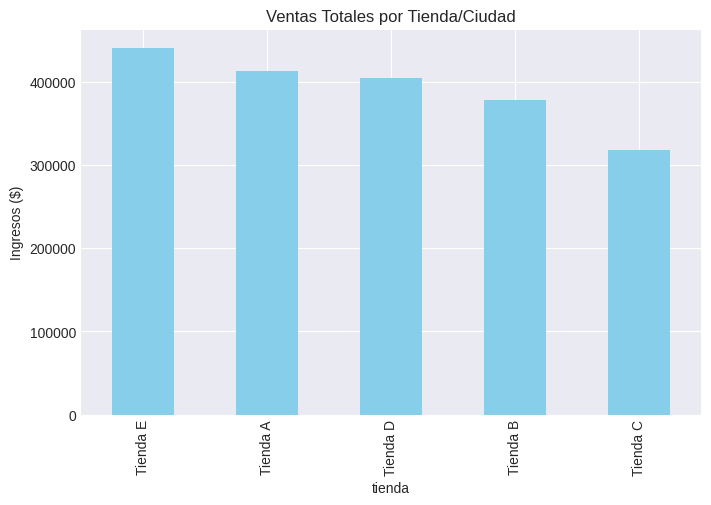

In [ ]:
# Gráfico
plt.figure(figsize=(8, 5))
ventas_tienda.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Tienda/Ciudad')
plt.ylabel('Ingresos ($)')
plt.show()

In [ ]:
# en este analisis se grafica el analisis de el categoria mas vendida
# agrupando
ventas_categoria = df_filtrado_fechas.groupby('categoria de producto')['total'].sum().sort_values(ascending=False)

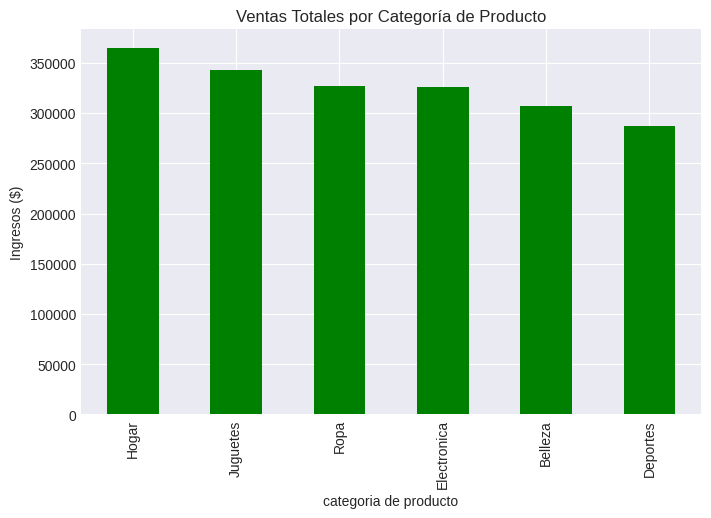

In [ ]:
plt.figure(figsize=(8, 5))
ventas_categoria.plot(kind='bar', color='green')
plt.title('Ventas Totales por Categoría de Producto')
plt.ylabel('Ingresos ($)')
plt.show()

In [ ]:
# se analisa y se grafica el que utilza la mejor estaragia de ventas vendedor
#
ventas_vendedor = df_filtrado_fechas.groupby('vendedor')['total'].sum().sort_values(ascending = False)

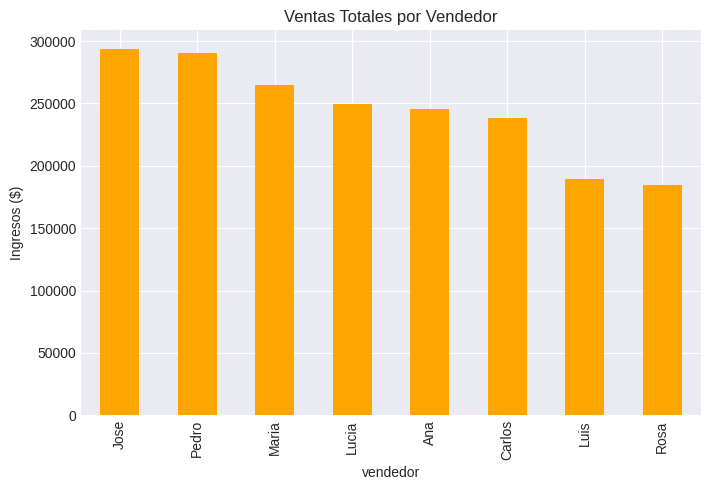

In [ ]:
plt.figure(figsize=(8,5))
ventas_vendedor.plot(kind='bar', color='orange')
plt.title('Ventas Totales por Vendedor')
plt.ylabel('Ingresos ($)')
plt.show()

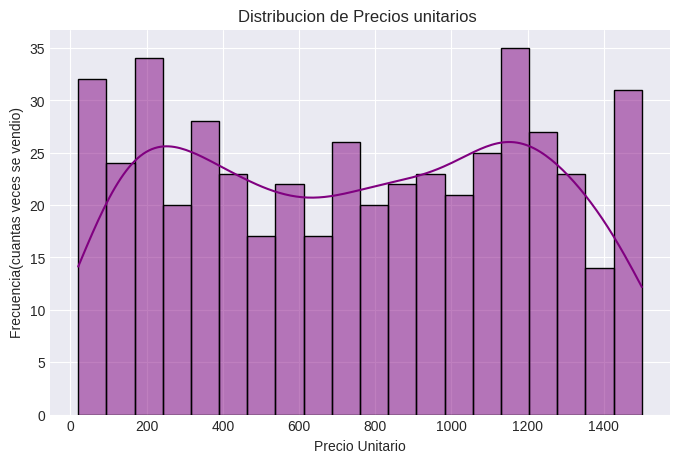

In [ ]:
# ¿Cómo se distribuyen el precio unitario y la cantidad por transacción? (Histogramas, boxplots).
# Histograma de precion unitario
plt.figure(figsize=(8, 5))
sns.histplot(df_filtrado_fechas["precio"], bins=20, kde=True, color='purple')
plt.title("Distribucion de Precios unitarios ")
plt.xlabel("Precio Unitario")
plt.ylabel("Frecuencia(cuantas veces se vendio)")
plt.show()

**Precio Unitario (Histograma): Si ves una "montaña" en los precios bajos, tu tienda es de volumen. Si la montaña está en los precios altos, es una tienda de lujo.**
En este grafico se muestra la montaña tanto en precios bajs como en precios altos

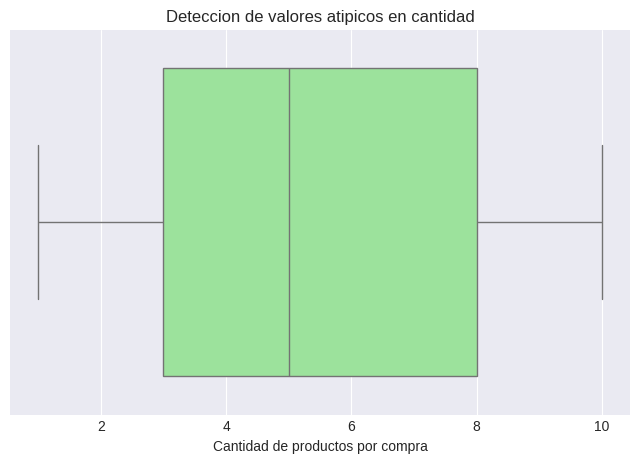

In [ ]:
# boxplot de cantidad por transaccion
plt.figure(figsize =(8,5))
sns.boxplot(x = df_filtrado_fechas['cantidad'], color="lightgreen")
plt.title("Deteccion de valores atipicos en cantidad")
plt.xlabel("Cantidad de productos por compra")
plt.show()


 **En el analisis del boxplot:**
* no se encuentran valores atipico outliers.
* Se tiene una distribución equilibrada. Tienes tanta gente comprando "poco" como gente comprando "mucho" (dentro de los límites normales).

****Análisis Bivariado y Multivariado:**

¿Existe correlación entre la categoría del producto y el ticket promedio?

¿Los mejores vendedores se especializan en categorías específicas o son generalistas?

¿Alguna tienda tiene una "especialización" natural en una categoría? (Ej. Tienda D vende mucha Electronica).


In [ ]:
# analisis de la media entre productos y total
ticket_promedio = df_filtrado_fechas.groupby('categoria de producto')['total'].mean().sort_values(ascending=False)
print("tiket promedio por categoria de producto")
print(ticket_promedio)

tiket promedio por categoria de producto
categoria de producto
Juguetes       4334.720380
Hogar          4195.669080
Deportes       4049.718451
Belleza        3994.140519
Electronica    3926.043855
Ropa           3763.983448
Name: total, dtype: float64


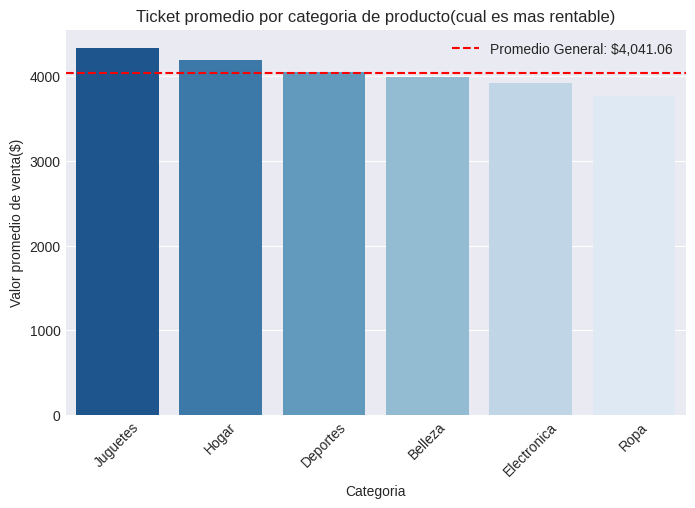

In [ ]:
#grafico de calor o de correlacion
plt.figure(figsize=(8, 5))
sns.barplot(x = ticket_promedio.index, y=ticket_promedio.values, palette="Blues_r")

plt.title("Ticket promedio por categoria de producto(cual es mas rentable)")
plt.ylabel("Valor promedio de venta($)")
plt.xlabel("Categoria")
plt.xticks(rotation = 45)

promedio_general = df_filtrado_fechas['total'].mean()
plt.axhline(y=promedio_general, color='red', linestyle='--', label=f'Promedio General: ${promedio_general:,.2f}')
plt.legend()
plt.show()

**Analisis del grafico de correlacion:**
* Rentable: juegueteria y hogar superando el promedio
* Promedio: deportes y bellaza se mantienen cercas del promedio.
* Mejora: electronica y ropa estando por debajo de la media

Text(100.58333333333333, 0.5, 'Vendedor')

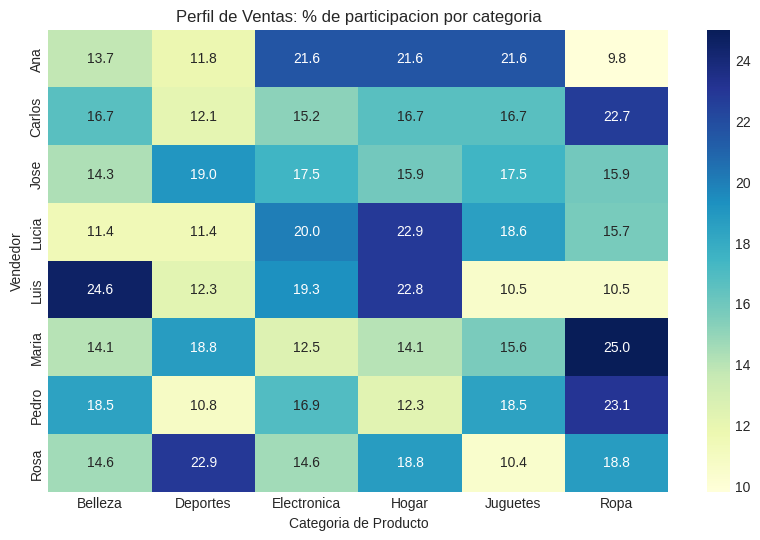

In [ ]:
#¿Los mejores vendedores se especializan en categorías específicas o son generalistas?
# creando tabla de frecuencias ( vendedor vs categoria)
perfil_vendedor = pd.crosstab(df_filtrado_fechas["vendedor"], df_filtrado_fechas['categoria de producto'],normalize="index")*100

plt.figure(figsize=(10, 6))
sns.heatmap(perfil_vendedor, annot = True, cmap="YlGnBu", fmt =".1f")
plt.title("Perfil de Ventas: % de participacion por categoria")
plt.xlabel("Categoria de Producto")
plt.ylabel("Vendedor")


**conclucion de grafico de calor generalistas**
cuando vemos porcentajes tan repartidos (la mayoría entre el 10% y el 22%), significa que no hay una especialización rígida. Casi todos tus vendedores saben vender de todo.
**Los "Todoterreno" (Generalistas puros)**
Jose y Ana: Si miras sus filas, los colores son muy parejos. No tienen picos extremos de 25% ni caídas drásticas.

**Los Especialistas (Los cuadros más oscuros)**
Estos son los vendedores que han encontrado un "nicho" o tienen más éxito en ciertas categorías:

* Luis es el experto en Belleza: Tiene un 24.6% de sus ventas ahí, su porcentaje más alto. Si tienes un producto nuevo de belleza, Luis es quien debería recibir la muestra primero.

* Maria es la experta en Ropa: Con un 25.0%, es quien más domina esta categoría. Curiosamente, la ropa era tu categoría con el ticket promedio más bajo; Maria podría darnos consejos de cómo vender más volumen ahí.

* Rosa domina Deportes: Tiene un 22.9% de participación. Claramente, se siente cómoda vendiendo artículos deportivos.

* Lucía destaca en Hogar: Con un 22.9%, lidera las ventas en una de las categorías más rentables (según tu gráfico de barras anterior).

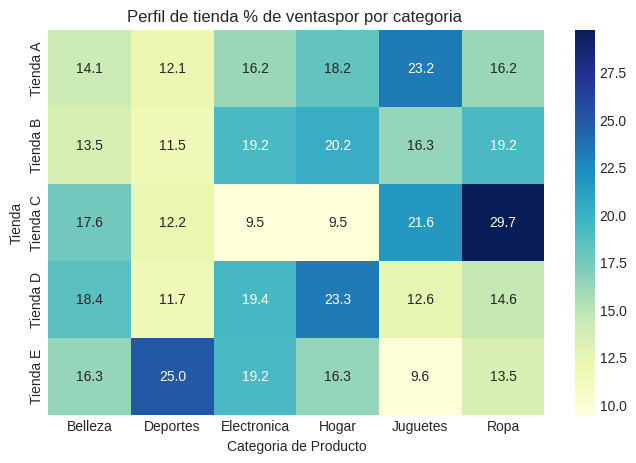

In [ ]:
#¿Alguna tienda tiene una "especialización" natural en una categoría? (Ej. Tienda D vende mucha Electronica).
perfil_tienda = pd.crosstab(df_filtrado_fechas["tienda"], df_filtrado_fechas['categoria de producto'],normalize="index")*100

plt.figure(figsize=(8, 5))
sns.heatmap(perfil_tienda, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Perfil de tienda % de ventaspor por categoria ")
plt.xlabel("Categoria de Producto")
plt.ylabel("Tienda")
plt.show()

* Tienda C - La Especialista en Ropa: Tiene el punto más oscuro de todo el gráfico con un 29.7%
- Dato curioso: Como vimos antes que la ropa tiene el ticket promedio más bajo, la Tienda C probablemente es una tienda de "alto volumen" pero de tickets pequeños.
* Tienda E - El Centro Deportivo: Su especialización es Deportes (25.0%). Es la tienda donde los clientes acuden específicamente por equipamiento deportivo,
* Tienda D - El Especialista en Hogar: Lidera con un 23.3% en Hogar. Dado que Hogar es una de tus categorías con ticket promedio alto, la Tienda D es clave para la rentabilidad total.
* Tienda A - La Casa de los Juguetes: Su fuerte son los Juguetes (23.2%). Siendo Juguetes la categoría con el ticket promedio más alto del negocio,

**Análisis de Cesta de la Compra:**
 ¿Hay productos que se suelen vender juntos en la misma transacción? (Requiere ID de transacción, que no tenemos, pero podríamos analizar por vendedor/día).

In [ ]:
df_filtrado_fechas.head()

,fecha,tienda,categoria de producto,vendedor,producto,cantidad,precio,total,ID_Unico
0,2026-01-02,Tienda B,Juguetes,Lucia,Puzzle 1000 piezas,6,625.01,3750.06,10001
1,2026-01-02,Tienda E,Hogar,Maria,Cafetera Delonghi,1,84.42,84.42,10002
2,2026-01-03,Tienda C,Ropa,Maria,Pantalon Levi's,5,560.97,2804.85,10003
3,2026-01-04,Tienda D,Electronica,Ana,Smartphone Samsung,10,1197.81,11978.10,10004
4,2026-01-05,Tienda E,Hogar,Maria,Ventilador Imaco,2,349.98,699.96,10005


In [ ]:
items_por_sesion = df_filtrado_fechas.groupby(['vendedor',"fecha"])['categoria de producto'].apply(list)

#items_por_ticket = df_filtrado_fechas.groupby('ID_Transaccion')['categoria'].apply(list)
# este es si existiera el id de transaccion original

from itertools import combinations
from collections import Counter

conteo_combos = Counter()
for items in items_por_sesion:
  # Eliminamos duplicados dentro de la misma sesión para no contar "Ropa-Ropa"
    items_unicos = sorted(list(set(items)))
    if len(items_unicos) > 1:
      # Creamos combinaciones de 2 categorías
       conteo_combos.update(combinations(sorted(items), 2))

print("Los 'combos' de categorías más frecuentes por sesión de vendedor son:")
for combo, frecuencia in conteo_combos.most_common(10):
    print(f"{combo}: {frecuencia} veces")



Los 'combos' de categorías más frecuentes por sesión de vendedor son:
('Juguetes', 'Ropa'): 2 veces
('Belleza', 'Ropa'): 2 veces
('Deportes', 'Ropa'): 1 veces
('Deportes', 'Juguetes'): 1 veces
('Belleza', 'Hogar'): 1 veces
('Electronica', 'Ropa'): 1 veces
('Electronica', 'Juguetes'): 1 veces


**Análisis de Tendencias:**

¿La participación de mercado de cada categoría ha cambiado con el tiempo?

¿Hay vendedores cuyo desempeño ha mejorado o empeorado significativamente a lo largo del tiempo?

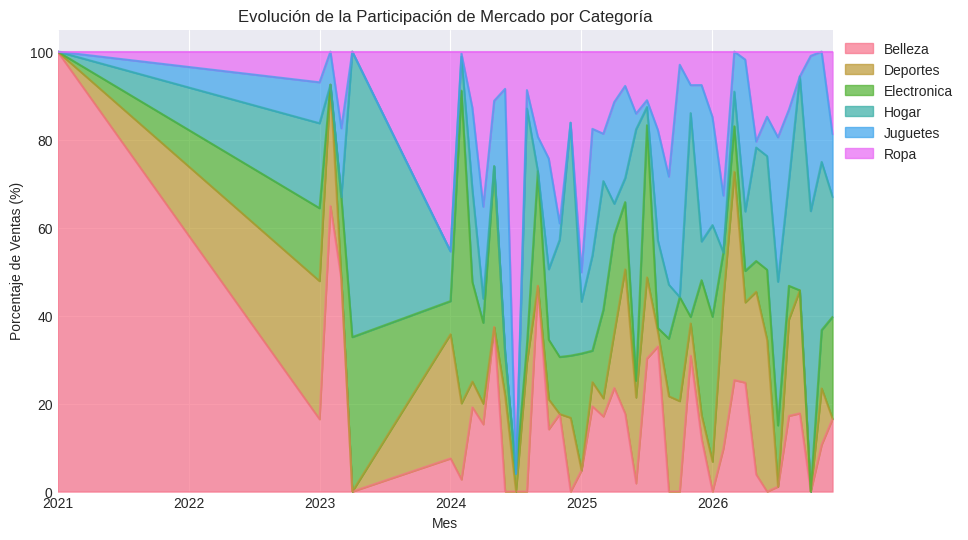

In [ ]:
# 1. Asegurar que la fecha sea mes/año para agrupar mejor
df_filtrado_fechas['Mes'] = df_filtrado_fechas['fecha'].dt.to_period('M')

# 2. Agrupar por Mes y Categoría sumando el total
market_share = df_filtrado_fechas.groupby(['Mes', 'categoria de producto'])['total'].sum().unstack().fillna(0)

# 3. Convertir a porcentajes (cada fila suma 100%)
market_share_pct = market_share.div(market_share.sum(axis=1), axis=0) * 100

# 4. Graficar
market_share_pct.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.7)
plt.title('Evolución de la Participación de Mercado por Categoría')
plt.ylabel('Porcentaje de Ventas (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
import plotly.express as px

# 1. Preparar los datos (usamos el DataFrame market_share_pct que calculamos antes)
# Necesitamos "derretir" (melt) el dataframe para que Plotly lo entienda
df_interactivo = market_share_pct.reset_index().melt(id_vars='Mes', var_name='Categoría', value_name='Porcentaje')

# Convertir el periodo de Mes a string para que Plotly no tenga problemas
df_interactivo['Mes'] = df_interactivo['Mes'].astype(str)

# 2. Crear el gráfico interactivo
fig = px.area(df_interactivo,
              x="Mes",
              y="Porcentaje",
              color="Categoría",
              title="Participación de Mercado Interactiva (2021-2026)",
              labels={"Porcentaje": "Cuota de Mercado (%)", "Mes": "Fecha"},
              line_group="Categoría",
              hover_data={"Porcentaje": ":.2f%"}) # Formato con 2 decimales y signo %

# 3. Mejorar el diseño
fig.update_layout(hovermode="x unified") # Muestra todas las categorías al mismo tiempo al pasar el mouse
fig.show()

In [ ]:
#
#agrupamos ventas por mes y vendedor
rendimiento_tiempo = df_filtrado_fechas.groupby(['Mes', 'vendedor'])['total'].sum().unstack().fillna(0)

# convertimos el indice en a string para graficar sin errores
rendimiento_tiempo.index = rendimiento_tiempo.index.astype(str)

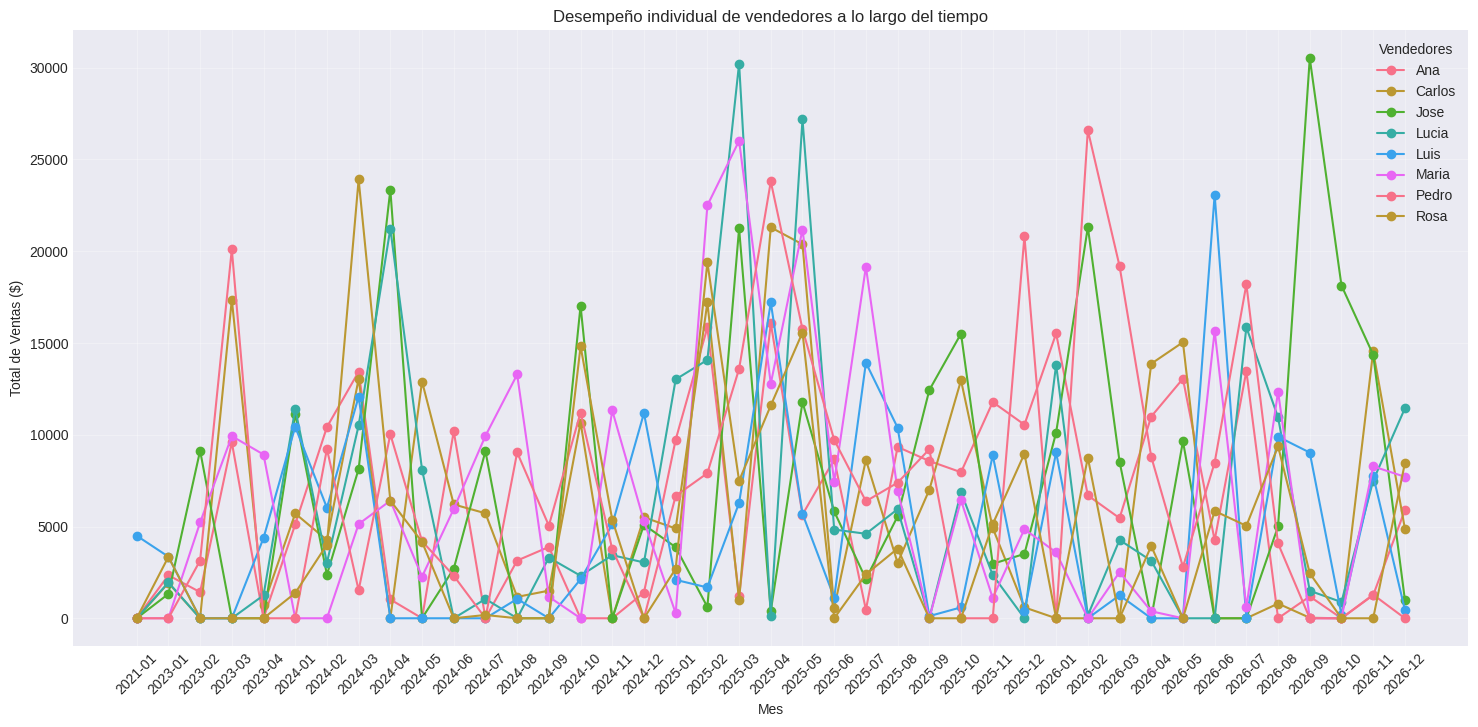

In [ ]:
# graficamos
plt.figure(figsize =(18,8))
for vendedor in rendimiento_tiempo.columns:
  plt.plot(rendimiento_tiempo.index, rendimiento_tiempo[vendedor], marker ="o", label =vendedor)

plt.title("Desempeño individual de vendedores a lo largo del tiempo")
plt.xlabel("Mes")
plt.ylabel("Total de Ventas ($)")
plt.xticks(rotation = 45)
plt.legend(title = "Vendedores", bbox_to_anchor=(1,1))
plt.grid(True, alpha = 0.3)
plt.show()

** Analisis del grafico**
1. El Fenómeno de la "Gran Explosión" (2025)
Al observar el eje del tiempo, notarás que entre 2021 y 2024 las ventas de todos los vendedores eran bajas y relativamente estables.

Hallazgo: A partir de enero de 2025, el gráfico "explota". Esto sugiere un cambio masivo en la estrategia de la empresa, una expansión de tiendas o una temporada de ventas sin precedentes.

MVP del Pico Máximo: Lucía (línea azul turquesa) alcanza el punto más alto de ventas registrado en todo el histórico justo a inicios de 2025, superando los $25,000 en un solo mes.

2. Identificación de Estrellas y Tendencias
Lucía (Consistencia en la Cima): No solo tiene el récord, sino que se mantiene constantemente en la parte alta del gráfico durante 2025 y 2026. Esto coincide con su especialización en Hogar (22.9%), una de las categorías más rentables.

Jose (El Crecimiento Agresivo): Su línea verde muestra picos muy altos hacia finales de 2026. Es un vendedor que ha mejorado significativamente su rendimiento conforme el mercado se diversificó.

Pedro y Carlos: Muestran un comportamiento muy volátil. Tienen meses de ventas altísimas seguidos de meses en cero. Esto podría indicar que se enfocan en cerrar pocas ventas pero de tickets muy grandes (como Electrónica, donde ambos tienen buena presencia).

3. La Estacionalidad es Real
Fíjate en los meses de enero-febrero y octubre-diciembre de 2025 y 2026. Casi todas las líneas suben al mismo tiempo.

Conclusión: Tu equipo no depende solo del talento individual, sino de ciclos de mercado muy fuertes. En esos meses es cuando más se venden los Juguetes, donde Ana destaca con un 21.6% de participación.

**5. Share (Compartir)**
Diapositiva 1: Portada y Objetivo
Título: Análisis de Crecimiento y Especialización: Hacia una estrategia basada en datos (2021-2026).

Subtítulo: Identificación de fortalezas por categoría, tienda y vendedor.

El Problema: El negocio necesitaba entender su diversificación histórica y quiénes son los motores de ingresos reales.

Diapositiva 2: De la Monocultura a la Diversidad
Gráfico: Áreas Apiladas al 100%.

Punto clave: En 2021 el negocio dependía de un solo sector, pero para 2026 hemos logrado una cartera diversificada y resiliente.

Insight: La volatilidad mensual sugiere que las ventas responden a impulsos promocionales, no a una demanda pasiva.

Diapositiva 3: El Poder de la Especialización
Gráfico: Mapa de calor de Vendedores.

Punto clave: El éxito no es genérico; es específico. Contamos con especialistas de alto impacto: Maria en Ropa (25%), Luis en Belleza (24.6%) y Lucía en Hogar (22.9%).

Insight: La especialización permite dominar categorías con diferentes tickets promedio, equilibrando volumen y margen.

Diapositiva 4: Geografía del Éxito (Tiendas)
Gráfico: Mapa de calor de Tiendas.

Punto clave: Cada sucursal tiene una "personalidad" de compra. La Tienda C es el centro de Ropa (29.7%), mientras que la Tienda A domina Juguetes (23.2%), la categoría más rentable.

Insight: Enviar el mismo inventario a todas las tiendas es ineficiente; debemos personalizar el stock según la demanda local detectada.

Diapositiva 5: Conclusiones y Plan de Acción (Fase 6: Act)
Gráfico: Líneas de Desempeño Histórico.

Punto clave: El salto de rendimiento en 2025 demuestra que el equipo tiene capacidad para superar los $25,000 mensuales por vendedor.

Recomendaciones:

Fomentar Combos: Unir Juguetes y Ropa en la Tienda A para elevar el ticket promedio de $4,041.06.

Capacitación Cruzada: Que los especialistas (Maria y Luis) compartan técnicas para reducir los meses con ventas bajas observados en el histórico.

**6. Act (Actuar)**
Esta fase suele ser la conclusión en texto dentro de tu Notebook (usando celdas Markdown) o una presentación final. Aquí das recomendaciones basadas en tus datos.

**Plan de Acción Estratégico**
1. Optimización de Inventario y Logística (Basado en el análisis de Tiendas)
Acción: Redistribuir el stock para que coincida con la especialización natural de cada sucursal.

Detalle: Incrementar en un 15% el inventario de Juguetes en la Tienda A (su fuerte: 23.2%) y de Ropa en la Tienda C (su fuerte: 29.7%) para evitar quiebres de stock en los productos que la gente ya busca ahí.

Meta: Reducir costos de almacenamiento de productos de baja rotación en tiendas donde no hay especialización.

2. Programa de "Mentoria de Especialistas" (Basado en el análisis de Vendedores)
Acción: Crear talleres internos liderados por tus "campeones" de categoría.

Detalle: Maria (experta en Ropa: 25%) y Luis (experto en Belleza: 24.6%) deben capacitar a vendedores como Ana o Lucía en sus respectivas áreas para elevar los niveles de participación en categorías con tickets bajos.

Meta: Estandarizar el conocimiento experto para que el rendimiento no dependa de una sola persona.

3. Estrategia de "Venta Incremental" (Basado en el análisis de Combos)
Acción: Implementar el "Combo Familiar" en los puntos de venta.

Detalle: Dado que detectamos que Juguetes y Ropa se venden juntos con frecuencia, colocar exhibidores de ropa infantil o básica dentro o junto al pasillo de juguetes.

Meta: Elevar el ticket promedio por encima de los $4,041.06 mediante la técnica de cross-selling.

4. Gestión de Estacionalidad y Metas (Basado en el análisis de Tendencias)
Acción: Ajustar las cuotas de ventas según los ciclos históricos detectados.

Detalle: Preparar campañas de marketing agresivas para los picos de inicio de año y octubre-diciembre, periodos donde Lucía y otros vendedores demostraron que el mercado puede absorber más de $25,000 en ventas individuales.

Meta: Aprovechar los momentos de alta demanda para maximizar el flujo de caja.

**Resumen para tu Portafolio (Fase 6)**

"La conclusión de este análisis no es solo descriptiva, sino prescriptiva. Al alinear el inventario con las fortalezas de las tiendas y capacitar al personal basándonos en sus especializaciones naturales, el negocio puede reducir la volatilidad detectada en el periodo 2021-2026 y estabilizar su crecimiento hacia el futuro".